<a href="https://colab.research.google.com/github/fairickoo/DatacomProject/blob/master/Dataset_with_Pre_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* VGG-16
* ResNet50
* Inceptionv3
* EfficientNet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import

In [ ]:
from numpy import expand_dims
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input

import tensorflow as tf

from PIL import Image 
from PIL import ImageFilter 

from scipy import ndimage
from skimage.transform import resize


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.preprocessing import image
import numpy as np
import os
import cv2
%matplotlib inline

In [ ]:
from os import listdir

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imread

from skimage.transform import resize
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Model, load_model
from keras.layers import Dense,GlobalAveragePooling2D
%matplotlib inline
import tensorflow as tf
import tensorflow

import time

#Dataset 0-9 



##with out augmentation

In [ ]:
TRAIN_DATA_PATH = '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09_wa_ori/'
NUM_OF_LETTERS =10
IMAGE_SIZE = 224 
NUM_OF_CHANNELS = 3 

train_ratio = 0.60
test_ratio = 0.20
val_ratio =0.20
LABELS = ['zero','one','two','three','four','five','six','seven','eight','nine']

In [ ]:

def create_data(DATA_PATH):
  try:
        x_train = np.load('/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-wa2/x_train.npy')
        y_train = np.load('/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-wa2/y_train.npy')
        x_test = np.load('/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-wa2/x_test.npy')
        y_test = np.load('/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-wa2/y_test.npy')
        x_val = np.load('/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-wa2/x_val.npy')
        y_val = np.load('/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-wa2/y_val.npy')
        x_train,  x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=1 - train_ratio,random_state=42)
        x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + val_ratio),random_state=42) 
  except:
        x_train=[]
        y_train=[]
        paths=[]
        for label in LABELS:
            path = os.path.join(DATA_PATH, label)
            label_name = LABELS.index(label)
            for img in os.listdir(path):
                p=os.path.join(path, img)
                paths.append(p)
                print(p)
                try:
                    img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format                
                    resized_arr = cv2.resize(img_arr, (IMAGE_SIZE, IMAGE_SIZE)) # Reshaping images to preferred size
                    x_train.append(resized_arr)
                    y_train.append(label_name)
                except Exception as e:
                    print(e)
        x_train = np.array(x_train).astype('float32') 
        y_train = np.array(y_train).astype('float32') 
        if not os.path.exists('/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-wa2/'):
                os.makedirs('/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-wa2/')
        
        np.save('/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-wa2/x_train.npy', x_train)
        np.save('/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-wa2/y_train.npy', y_train)
        x_train,  x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=1 - train_ratio,random_state=42)
        x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + val_ratio),random_state=42) 
        np.save('/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-wa2/x_test.npy', x_test)
        np.save('/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-wa2/y_test.npy', y_test)
        np.save('/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-wa2/x_val.npy', x_val)
        np.save('/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-wa2/y_val.npy', y_val)
  return x_train,  x_test, x_val, y_train, y_test ,y_val

#main
train_images, test_images, val_images, train_labels, test_labels,val_labels = create_data(TRAIN_DATA_PATH)

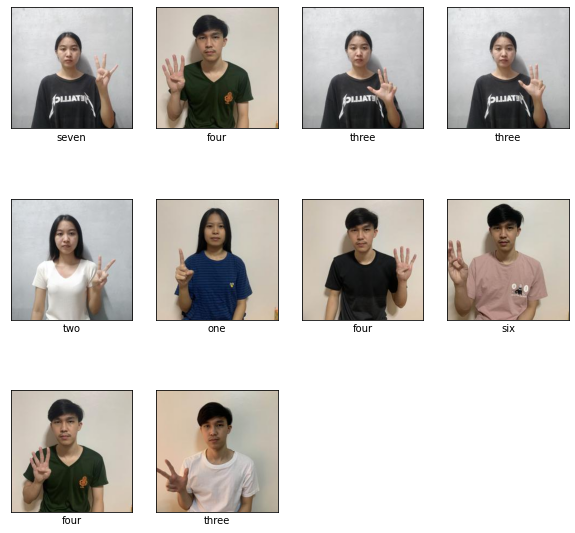

In [ ]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(3,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].astype('int'))
    plt.xlabel(LABELS[train_labels[i].astype('int')])
plt.show()

##augmentation

In [ ]:
TRAIN_DATA_PATH = '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09_a_ori/'
NUM_OF_LETTERS =10
IMAGE_SIZE = 224 
NUM_OF_CHANNELS = 3 

train_ratio = 0.60
test_ratio = 0.20
val_ratio =0.20

In [ ]:

def create_data(DATA_PATH):
  try:
        x_train = np.load('/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a/x_train.npy')
        y_train = np.load('/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a/y_train.npy')
        x_test = np.load('/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a/x_test.npy')
        y_test = np.load('/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a/y_test.npy')
        x_val = np.load('/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a/x_val.npy')
        y_val = np.load('/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a/y_val.npy')
        x_train,  x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=1 - train_ratio,random_state=42)
        x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + val_ratio),random_state=42) 
  except:
        LABELS = ['zero','one','two','three','four','five','six','seven','eight','nine']
        x_train=[]
        y_train=[]
        paths=[]
        for label in LABELS:
            path = os.path.join(DATA_PATH, label)
            label_name = LABELS.index(label)
            for img in os.listdir(path):
                p=os.path.join(path, img)
                paths.append(p)
                print(p)
                try:
                    img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format                
                    resized_arr = cv2.resize(img_arr, (IMAGE_SIZE, IMAGE_SIZE)) # Reshaping images to preferred size
                    x_train.append(resized_arr)
                    y_train.append(label_name)
                except Exception as e:
                    print(e)
        x_train = np.array(x_train).astype('float32')
        y_train = np.array(y_train).astype('float32')
        if not os.path.exists('/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a/'):
                os.makedirs('/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a/')
        
        np.save('/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a/x_train.npy', x_train)
        np.save('/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a/y_train.npy', y_train)
        x_train,  x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=1 - train_ratio,random_state=42)
        x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + val_ratio),random_state=42) 
        np.save('/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a/x_test.npy', x_test)
        np.save('/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a/y_test.npy', y_test)
        np.save('/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a/x_val.npy', x_val)
        np.save('/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a/y_val.npy', y_val)
  return x_train,  x_test, x_val, y_train, y_test ,y_val

#main
train_images, test_images, val_images, train_labels, test_labels,val_labels = create_data(TRAIN_DATA_PATH)

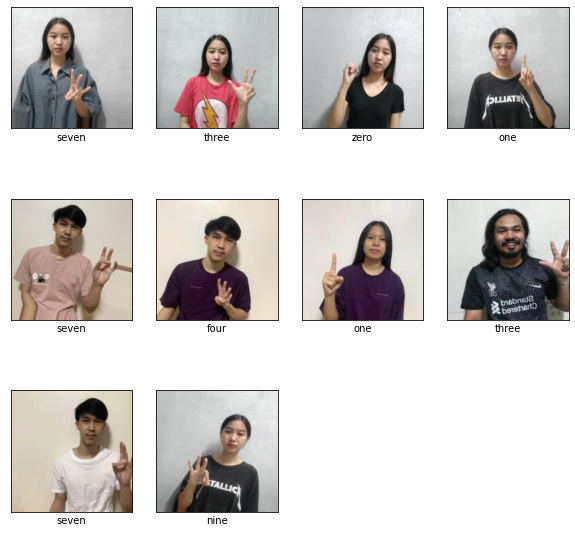

In [ ]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(3,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].astype('int'))
    plt.xlabel(LABELS[train_labels[i]])
plt.show()

In [ ]:
print(val_labels.shape)

(2702,)


In [ ]:
train_images = np.array(train_images).astype('float32') 
test_images = np.array(test_images).astype('float32')  
val_images= np.array(val_images).astype('float32') 

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le1.fit(train_labels)
le2.fit(test_labels)
le3.fit(val_labels)
train_labels = le1.transform(train_labels)
test_labels = le2.transform(test_labels)
val_labels = le3.transform(val_labels)


In [ ]:
train_labels= np.array(train_labels).astype('float32') 
test_labels= np.array(test_labels).astype('float32') 
val_labels= np.array(val_labels).astype('float32') 

#resNet50 101

##with out augmentation

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
conv_base_ResNet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224, 3))

94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
#In this case, we ‘freeze’ all layers except for the last block of the ResNet50. 
for layer in conv_base_ResNet50.layers[:143]:
  layer.trainable = False


In [ ]:
modelResNet50_09_wa = models.Sequential()
modelResNet50_09_wa.add(conv_base_ResNet50)
modelResNet50_09_wa.add(layers.Flatten())
modelResNet50_09_wa.add(layers.BatchNormalization())
modelResNet50_09_wa.add(layers.Dense(256, activation='relu'))

modelResNet50_09_wa.add(layers.Dropout(0.5))
modelResNet50_09_wa.add(layers.BatchNormalization())

modelResNet50_09_wa.add(layers.Dense(128, activation='relu'))
modelResNet50_09_wa.add(layers.Dropout(0.5))
modelResNet50_09_wa.add(layers.BatchNormalization())

modelResNet50_09_wa.add(layers.Dense(64, activation='relu'))
modelResNet50_09_wa.add(layers.Dropout(0.5))
modelResNet50_09_wa.add(layers.BatchNormalization())
modelResNet50_09_wa.add(layers.Dense(10, activation='softmax'))
modelResNet50_09_wa.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_6 (Flatten)          (None, 100352)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 100352)            401408    
_________________________________________________________________
dense_16 (Dense)             (None, 256)               25690368  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_17 (Dense)             (None, 128)              

In [ ]:
#adam = Adam(lr=0.0001)
modelResNet50_09_wa.compile(optimizer= 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 20 epoch

In [ ]:
start = time.time()
history_ResNet_09_wa = modelResNet50_09_wa.fit(train_images, train_labels,batch_size=64,epochs=20,validation_data=(val_images, val_labels))
end = time.time()

Epoch 1/20
12/12 [==============================] - 24s 2s/step - loss: 2.9481 - accuracy: 0.1014 - val_loss: 15.3901 - val_accuracy: 0.0833
Epoch 2/20
12/12 [==============================] - 18s 2s/step - loss: 2.7732 - accuracy: 0.1097 - val_loss: 13.3080 - val_accuracy: 0.0750
Epoch 3/20
12/12 [==============================] - 18s 2s/step - loss: 2.7070 - accuracy: 0.1542 - val_loss: 17.3988 - val_accuracy: 0.0833
Epoch 4/20
12/12 [==============================] - 18s 2s/step - loss: 2.6616 - accuracy: 0.1347 - val_loss: 29.6089 - val_accuracy: 0.0917
Epoch 5/20
12/12 [==============================] - 18s 2s/step - loss: 2.5430 - accuracy: 0.1764 - val_loss: 35.9078 - val_accuracy: 0.0792
Epoch 6/20
12/12 [==============================] - 18s 2s/step - loss: 2.5053 - accuracy: 0.1486 - val_loss: 33.3655 - val_accuracy: 0.0958
Epoch 7/20
12/12 [==============================] - 18s 2s/step - loss: 2.4178 - accuracy: 0.1819 - val_loss: 26.5735 - val_accuracy: 0.1125
Epoch 8/20
12

In [ ]:
test_loss, test_acc=modelResNet50_09_wa.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

8/8 [==============================] - 3s 420ms/step - loss: 1.8833 - accuracy: 0.4292
test_acc: 0.42916667461395264


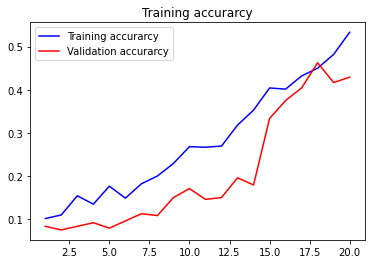

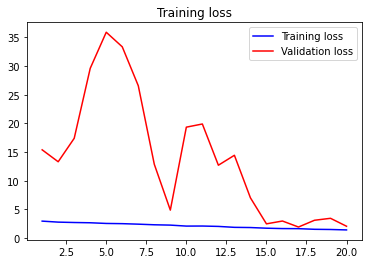

In [ ]:
acc = history_ResNet_09_wa.history['accuracy']
val_acc = history_ResNet_09_wa.history['val_accuracy']
loss = history_ResNet_09_wa.history['loss']
val_loss =history_ResNet_09_wa.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training loss')
plt.legend()
plt.show()

### 50 epoch

In [ ]:
start = time.time()
history_ResNet_09_wa1 = modelResNet50_09_wa.fit(train_images, train_labels,batch_size=64,epochs=50,validation_data=(val_images, val_labels))
end = time.time()

Epoch 1/50
12/12 [==============================] - 23s 2s/step - loss: 2.4449 - accuracy: 0.1097 - val_loss: 138.0336 - val_accuracy: 0.0750
Epoch 2/50
12/12 [==============================] - 19s 2s/step - loss: 2.2819 - accuracy: 0.1681 - val_loss: 56.3164 - val_accuracy: 0.0958
Epoch 3/50
12/12 [==============================] - 20s 2s/step - loss: 2.1604 - accuracy: 0.2056 - val_loss: 143.0723 - val_accuracy: 0.1083
Epoch 4/50
12/12 [==============================] - 20s 2s/step - loss: 2.0938 - accuracy: 0.2639 - val_loss: 161.7011 - val_accuracy: 0.1083
Epoch 5/50
12/12 [==============================] - 20s 2s/step - loss: 1.9740 - accuracy: 0.2764 - val_loss: 43.4424 - val_accuracy: 0.1125
Epoch 6/50
12/12 [==============================] - 20s 2s/step - loss: 1.9098 - accuracy: 0.3125 - val_loss: 8.4562 - val_accuracy: 0.1292
Epoch 7/50
12/12 [==============================] - 20s 2s/step - loss: 1.8146 - accuracy: 0.3431 - val_loss: 12.6016 - val_accuracy: 0.1208
Epoch 8/50


In [ ]:
test_loss, test_acc=modelResNet50_09_wa.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

8/8 [==============================] - 4s 428ms/step - loss: 1.8816 - accuracy: 0.6000
test_acc: 0.6000000238418579


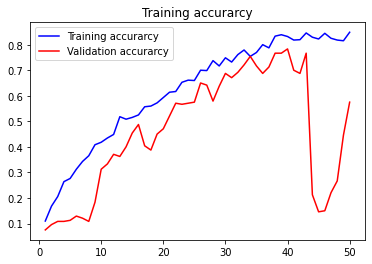

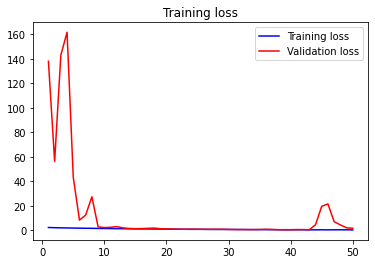

In [ ]:
acc = history_ResNet_09_wa1.history['accuracy']
val_acc = history_ResNet_09_wa1.history['val_accuracy']
loss = history_ResNet_09_wa1.history['loss']
val_loss =history_ResNet_09_wa1.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training loss')
plt.legend()
plt.show()

### 40 epoch

In [ ]:
start = time.time()
history_ResNet_09_wa2 = modelResNet50_09_wa.fit(train_images, train_labels,batch_size=64,epochs=40,validation_data=(val_images, val_labels))
end = time.time()

Epoch 1/40
12/12 [==============================] - 22s 2s/step - loss: 0.4367 - accuracy: 0.8722 - val_loss: 2.1236 - val_accuracy: 0.5792
Epoch 2/40
12/12 [==============================] - 21s 2s/step - loss: 0.4146 - accuracy: 0.8847 - val_loss: 0.9719 - val_accuracy: 0.6750
Epoch 3/40
12/12 [==============================] - 21s 2s/step - loss: 0.4308 - accuracy: 0.8667 - val_loss: 0.6972 - val_accuracy: 0.7625
Epoch 4/40
12/12 [==============================] - 21s 2s/step - loss: 0.4154 - accuracy: 0.8722 - val_loss: 0.6814 - val_accuracy: 0.7417
Epoch 5/40
12/12 [==============================] - 20s 2s/step - loss: 0.3459 - accuracy: 0.9139 - val_loss: 0.7000 - val_accuracy: 0.7458
Epoch 6/40
12/12 [==============================] - 20s 2s/step - loss: 0.3609 - accuracy: 0.9111 - val_loss: 0.6059 - val_accuracy: 0.7750
Epoch 7/40
12/12 [==============================] - 22s 2s/step - loss: 0.4228 - accuracy: 0.8736 - val_loss: 0.6553 - val_accuracy: 0.7625
Epoch 8/40
12/12 [==

In [ ]:
test_loss, test_acc=modelResNet50_09_wa.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

8/8 [==============================] - 3s 399ms/step - loss: 11.6643 - accuracy: 0.1292
test_acc: 0.12916666269302368


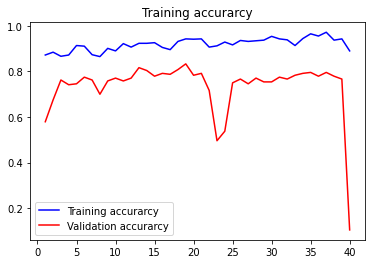

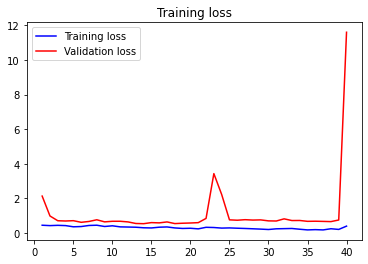

In [ ]:
acc = history_ResNet_09_wa2.history['accuracy']
val_acc = history_ResNet_09_wa2.history['val_accuracy']
loss = history_ResNet_09_wa2.history['loss']
val_loss =history_ResNet_09_wa2.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training loss')
plt.legend()
plt.show()